### Exploratory Analysis

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
!pip install nltk

In [16]:
import nltk  
nltk.download('vader_lexicon')  
from nltk.sentiment import SentimentIntensityAnalyzer    
sia = SentimentIntensityAnalyzer() 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
from wordcloud import WordCloud  
from nltk.sentiment import SentimentIntensityAnalyzer  
from collections import Counter  
import plotly.express as px

In [63]:
%cd "C:/Users/HP/Downloads/15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform_"

C:\Users\HP\Downloads\15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform_


In [64]:
data = pd.read_csv('Womens Clothing Reviews Data.csv')

In [65]:
data.head()

Product ID        Category Subcategory1 SubCategory2   Location Channel  \
0         767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1        1080         General      Dresses      Dresses  Bangalore  Mobile   
2        1077         General      Dresses      Dresses    Gurgaon  Mobile   
3        1049  General Petite      Bottoms        Pants    Chennai     Web   
4         847         General         Tops      Blouses  Bangalore     Web   

   Customer Age             Review Title  \
0            33                      NaN   
1            34                      NaN   
2            60  Some major design flaws   
3            50         My favorite buy!   
4            47         Flattering shirt   

                                         Review Text  Rating  Recommend Flag  
0  Absolutely wonderful - silky and sexy and comf...       4               1  
1  Love this dress!  it's sooo pretty.  i happene...       5               1  
2  I had such high hopes for this dress and reall...       3               0  
3  I love, love, love this jumpsuit. it's fun, fl...       5               1  
4  This shirt is very flattering to all due to th...       5               1

In [66]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [67]:
print(data.columns)

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag'],
      dtype='object')


In [68]:
data.describe()

Product ID  Customer Age        Rating  Recommend Flag
count  23486.000000  23486.000000  23486.000000    23486.000000
mean     918.118709     43.198544      4.196032        0.822362
std      203.298980     12.279544      1.110031        0.382216
min        0.000000     18.000000      1.000000        0.000000
25%      861.000000     34.000000      4.000000        1.000000
50%      936.000000     41.000000      5.000000        1.000000
75%     1078.000000     52.000000      5.000000        1.000000
max     1205.000000     99.000000      5.000000        1.000000

**User-Defined Functions for Analysis**

In [69]:
# Function to summarize the dataset  
def data_summary(df):  
    summary = {  
        "Shape": df.shape,  
        "Missing Values": df.isnull().sum(),  
        "Descriptive Statistics": df.describe(include='all')  
    }  
    return summary  

In [70]:
# Display data summary  
summary = data_summary(data)  
summary

{'Shape': (23486, 11),
 'Missing Values': Product ID           0
 Category            14
 Subcategory1        14
 SubCategory2        14
 Location             0
 Channel              0
 Customer Age         0
 Review Title      3810
 Review Text        845
 Rating               0
 Recommend Flag       0
 dtype: int64,
 'Descriptive Statistics':           Product ID Category Subcategory1 SubCategory2 Location Channel  \
 count   23486.000000    23472        23472        23472    23486   23486   
 unique           NaN        3            6           20        4       2   
 top              NaN  General         Tops      Dresses  Gurgaon     Web   
 freq             NaN    13850        10468         6319     8821   13583   
 mean      918.118709      NaN          NaN          NaN      NaN     NaN   
 std       203.298980      NaN          NaN          NaN      NaN     NaN   
 min         0.000000      NaN          NaN          NaN      NaN     NaN   
 25%       861.000000      NaN        

In [19]:
# Function to plot the distribution of ratings  
def plot_rating_distribution(df):  
    plt.figure(figsize=(10, 6))  
    sns.countplot(data=df, x='Rating', palette='viridis')  
    plt.title('Distribution of Ratings')  
    plt.xlabel('Rating')  
    plt.ylabel('Count')  
    plt.xticks(rotation=0)  
    plt.show()

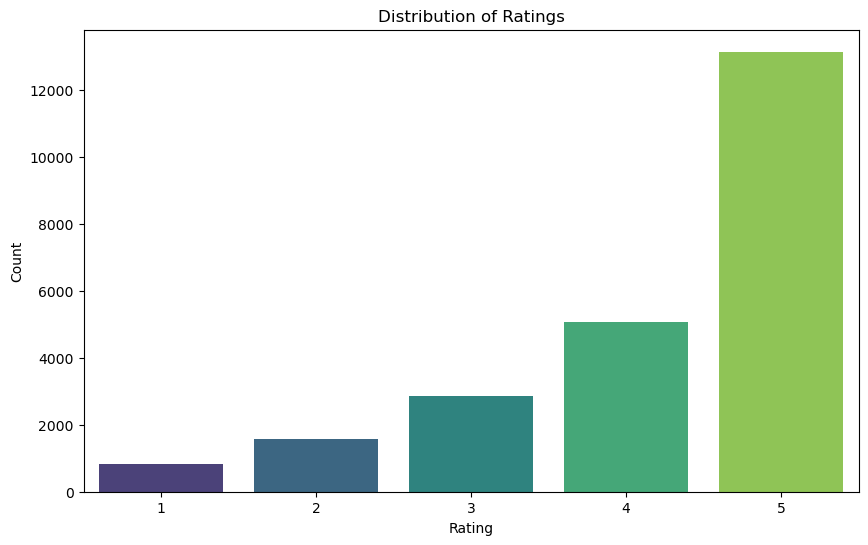

In [20]:
# Plot distribution of ratings  
plot_rating_distribution(data)  

In [21]:
# Function to create a WordCloud from reviews  
def create_wordcloud(text, title):  
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)  
    plt.figure(figsize=(10, 5))  
    plt.imshow(wordcloud, interpolation='bilinear')  
    plt.axis('off')  
    plt.title(title)  
    plt.show() 

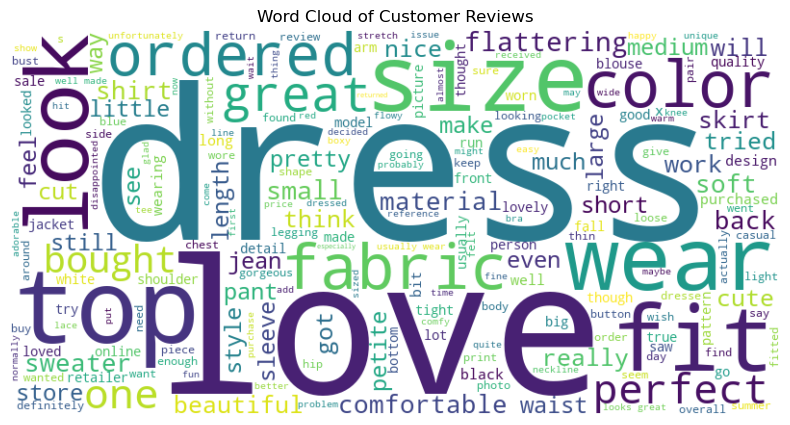

In [22]:
# Create WordCloud from the Review Text  
all_reviews = ' '.join(data['Review Text'].dropna())  
create_wordcloud(all_reviews, title='Word Cloud of Customer Reviews') 

In [23]:
# Function for sentiment analysis  
def sentiment_analysis(df):  
    df['Review Text'] = df['Review Text'].fillna('')    
    df['Review Text'] = df['Review Text'].astype(str) 
      
    df['Sentiment'] = df['Review Text'].apply(lambda x: sia.polarity_scores(x)['compound'])  

    return df

In [24]:
# Perform sentiment analysis  
data = sentiment_analysis(data) 

In [25]:
# Function to plot the sentiment analysis results  
def plot_sentiment_distribution(df):  
    plt.figure(figsize=(10, 6))  
    sns.histplot(df['Sentiment'], bins=50, kde=True, color='purple')  
    plt.title('Sentiment Distribution of Reviews')  
    plt.xlabel('Sentiment Score')  
    plt.ylabel('Frequency')  
    plt.show()

C:\Users\HP\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


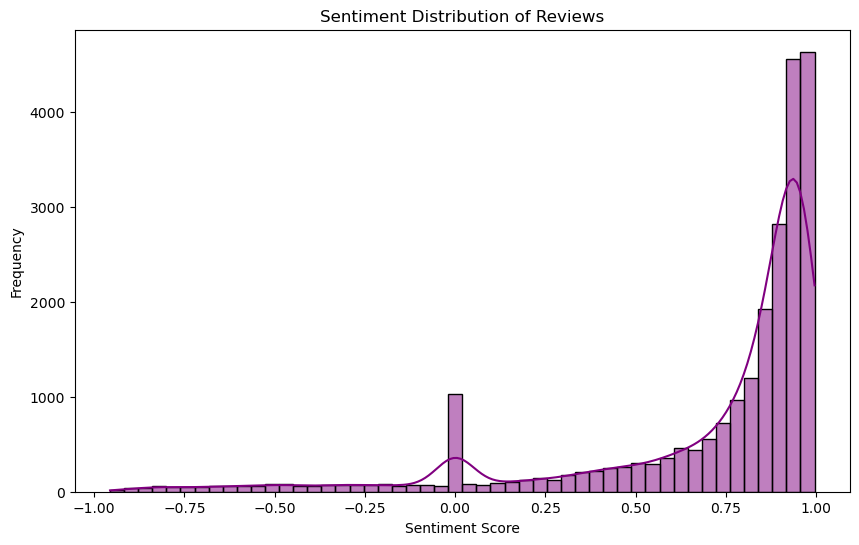

In [26]:
plot_sentiment_distribution(data)

In [27]:
# Function to analyze sentiment by channel  
def sentiment_by_channel(df):  
    channel_sentiment = df.groupby('Channel')['Sentiment'].mean().reset_index()  
    plt.figure(figsize=(10, 6))  
    sns.barplot(data=channel_sentiment, x='Channel', y='Sentiment', palette='coolwarm')  
    plt.title('Average Sentiment by Channel')  
    plt.xlabel('Channel')  
    plt.ylabel('Average Sentiment Score')  
    plt.show() 

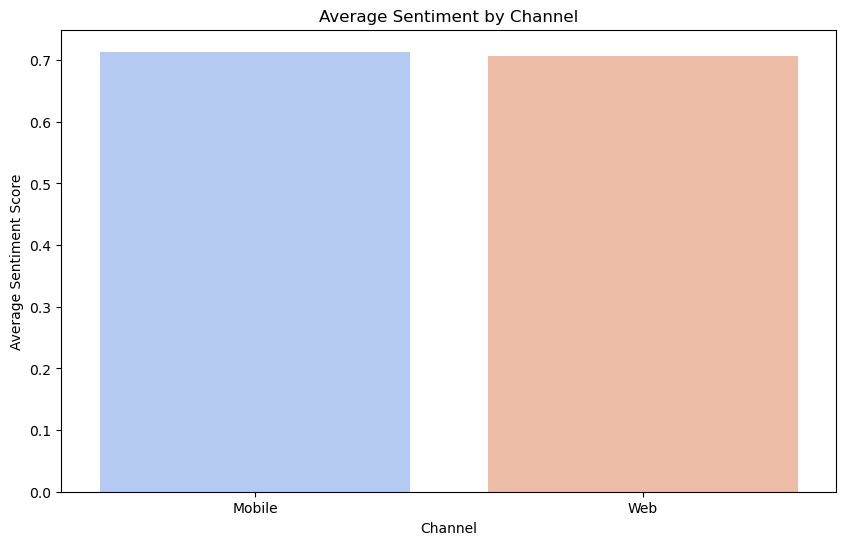

In [28]:
sentiment_by_channel(data)  

In [29]:
# Function for age group distribution  
def age_group_distribution(df):  
    age_bins = [0, 18, 25, 35, 45, 55, 65, 100]  
    age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']  
    df['Age Group'] = pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels)  
    
    plt.figure(figsize=(10, 6))  
    sns.countplot(data=df, x='Age Group', palette='pastel')  
    plt.title('Distribution of Customer Age Groups')  
    plt.xlabel('Age Group')  
    plt.ylabel('Count')  
    plt.xticks(rotation=45)  
    plt.show() 

C:\Users\HP\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


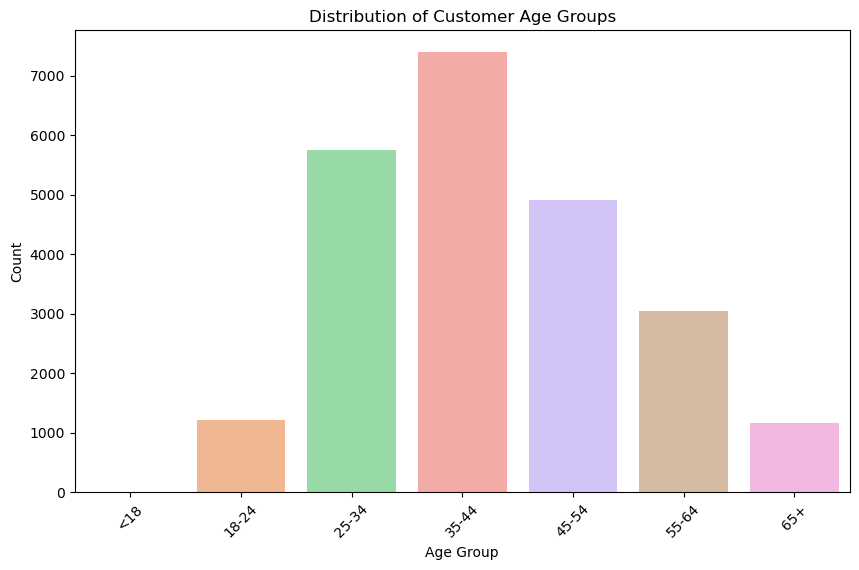

In [30]:
# Analyze age group distribution  
age_group_distribution(data) 

In [31]:
# Function to analyze reviews by location  
def reviews_by_location(df):  
    top_locations = df['Location'].value_counts().head(4).index.tolist()  
    filtered_df = df[df['Location'].isin(top_locations)]  

    plt.figure(figsize=(10, 6))  
    sns.countplot(data=filtered_df, x='Location', order=top_locations, palette='Set2')  
    plt.title('Top Locations with Most Reviews')  
    plt.xlabel('Location')  
    plt.ylabel('Review Counts')  
    plt.xticks(rotation=45)  
    plt.show()

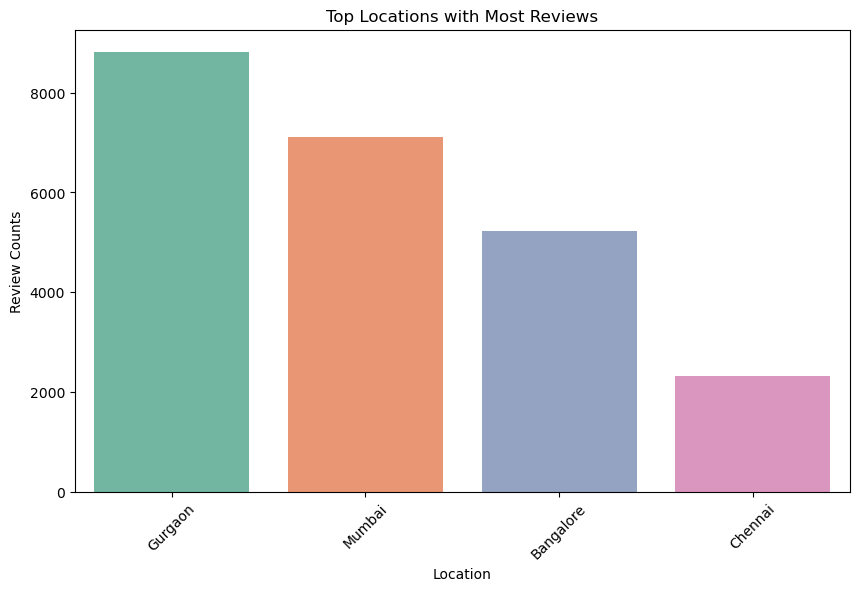

In [32]:
# Analyze reviews by location  
reviews_by_location(data) 

**Dashboard Visualization Using Plotly**

In [33]:
def create_dashboard(df):  
    fig = px.histogram(df, x='Rating', title='Rating Distribution', color='Channel', barmode='overlay')  
    fig.show()  

    sentiment_fig = px.box(df, x='Channel', y='Sentiment', title='Sentiment Score by Channel')  
    sentiment_fig.show()  

# Execute the dashboard  
create_dashboard(data)

C:\Users\HP\anaconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [77]:
!pip install dash

  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/3c/ea/227b2108053c7f38c175e884a45daf8cee112719499581be8cc137ecc19d/dash-2.18.1-py3-none-any.whl.metadata
  Obtaining dependency information for dash-html-components==2.0.0 from https://files.pythonhosted.org/packages/75/65/1b16b853844ef59b2742a7de74a598f376ac0ab581f0dcc34db294e5c90e/dash_html_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-core-components==2.0.0 from https://files.pythonhosted.org/packages/00/9e/a29f726e84e531a36d56cff187e61d8c96d2cc253c5bcef9a7695acb7e6a/dash_core_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-table==5.0.0 from https://files.pythonhosted.org/packages/da/ce/43f77dc8e7bbad02a9f88d07bf794eaf68359df756a28bb9f2f78e255bb1/dash_table-5.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for retrying from https://files.pythonhosted.org/packages/8f/04/9e36f28be4c0532c0e9207ff9dc01fb

In [78]:
import dash  
import dash_core_components as dcc  
import dash_html_components as html  
import plotly.express as px  

C:\Users\HP\AppData\Local\Temp\ipykernel_10052\3006227805.py:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

C:\Users\HP\AppData\Local\Temp\ipykernel_10052\3006227805.py:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [79]:
app = dash.Dash(__name__)  

# Layout of Dash App  
app.layout = html.Div([  
    html.H1("Interactive Distribution Visualization"),  
    dcc.Dropdown(  
        id='column-dropdown',  
        options=[{'label': col, 'value': col} for col in df.columns],  
        value='Category'  
    ),  
    dcc.Graph(id='distribution-graph'),  
])  

# Callback to update graph  
@app.callback(  
    dash.dependencies.Output('distribution-graph', 'figure'),  
    [dash.dependencies.Input('column-dropdown', 'value')]  
)  
def update_graph(selected_column):  
    fig = px.histogram(df, x=selected_column, title=f'Histogram of {selected_column}')  
    return fig  

if __name__ == '__main__':  
    app.run_server(debug=True)  

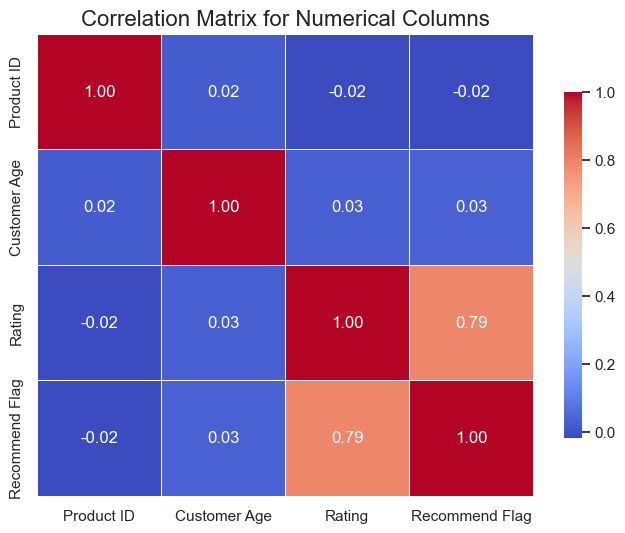

In [95]:
# Selecting only numerical columns
numerical_columns = ['Product ID', 'Customer Age', 'Rating', 'Recommend Flag']
data_numerical = data[numerical_columns]

corr_matrix = data_numerical.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, 
            annot=True,       
            fmt='.2f',          
            cmap='coolwarm',    
            linewidths=0.5,      
            cbar_kws={"shrink": .75})  


plt.title('Correlation Matrix for Numerical Columns', fontsize=16)

plt.show()


In [163]:
# Scatter and density plots

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

C:\Users\rishi\AppData\Local\Temp\ipykernel_7024\102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.

  df = df.dropna('columns')


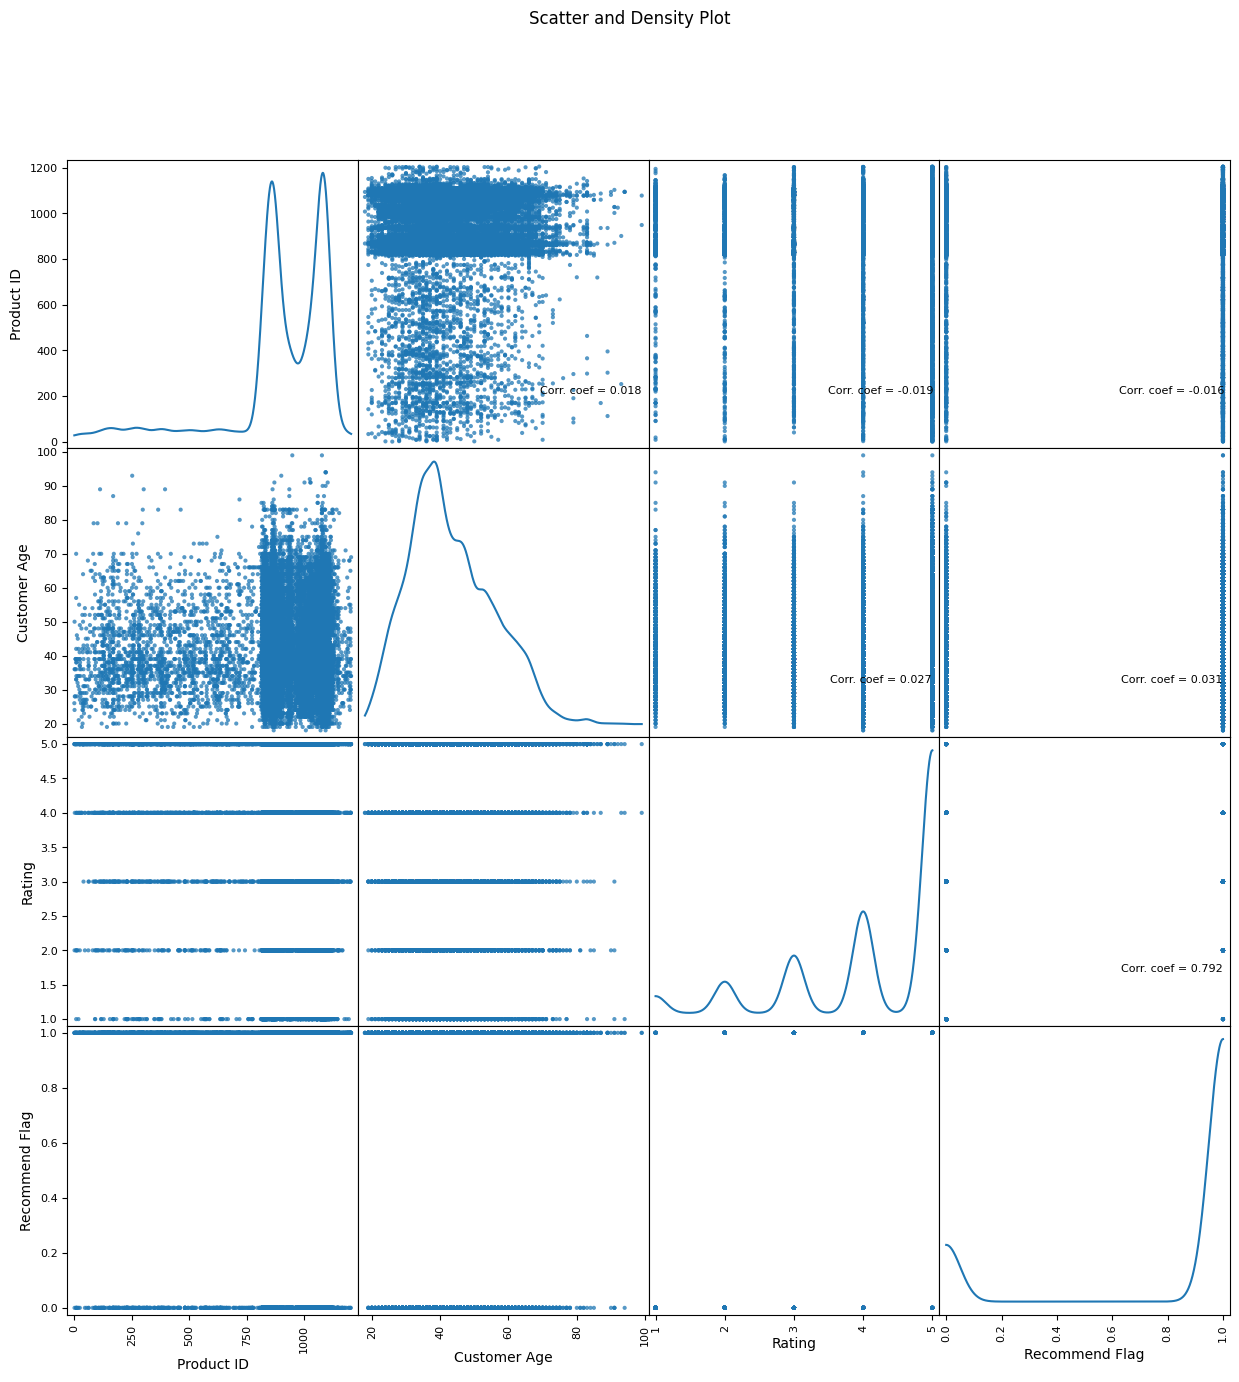

In [65]:
plotScatterMatrix(data, 15, 8)

### Predictive Analysis & Model Building 

**Here we are a model for predicting which customers are recommending, also predicting rating based on the review so, we need only ratings and reviews columns. We will drop rest of the columns**

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 23486 entries, 0 to 23485

Data columns (total 11 columns):

 #   Column          Non-Null Count  Dtype 

---  ------          --------------  ----- 

 0   Product ID      23486 non-null  int64 

 1   Category        23472 non-null  object

 2   Subcategory1    23472 non-null  object

 3   SubCategory2    23472 non-null  object

 4   Location        23486 non-null  object

 5   Channel         23486 non-null  object

 6   Customer Age    23486 non-null  int64 

 7   Review Title    19676 non-null  object

 8   Review Text     22641 non-null  object

 9   Rating          23486 non-null  int64 

 10  Recommend Flag  23486 non-null  int64 

dtypes: int64(4), object(7)

memory usage: 2.0+ MB


In [165]:
data.drop(['Product ID', 'Customer Age', 'Review Title', 'Recommend Flag', 'Channel', 'Category', 'Subcategory1', 'SubCategory2','Location'], axis=1, inplace=True)


In [166]:
data.columns= ['Review Text', 'Rating']
data.head()

Review Text  Rating
0  Absolutely wonderful - silky and sexy and comf...       4
1  Love this dress!  it's sooo pretty.  i happene...       5
2  I had such high hopes for this dress and reall...       3
3  I love, love, love this jumpsuit. it's fun, fl...       5
4  This shirt is very flattering to all due to th...       5

In [167]:
data.isnull().sum()

Review Text    845
Rating           0
dtype: int64

In [168]:
data.dropna(subset=['Review Text'], inplace=True)

In [169]:
data.duplicated().sum()

7

In [170]:
data.drop_duplicates(keep='first')

Review Text  Rating
0      Absolutely wonderful - silky and sexy and comf...       4
1      Love this dress!  it's sooo pretty.  i happene...       5
2      I had such high hopes for this dress and reall...       3
3      I love, love, love this jumpsuit. it's fun, fl...       5
4      This shirt is very flattering to all due to th...       5
...                                                  ...     ...
23481  I was very happy to snag this dress at such a ...       5
23482  It reminds me of maternity clothes. soft, stre...       3
23483  This fit well, but the top was very see throug...       3
23484  I bought this dress for a wedding i have this ...       3
23485  This dress in a lovely platinum is feminine an...       5

[22634 rows x 2 columns]

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 22641 entries, 0 to 23485

Data columns (total 2 columns):

 #   Column       Non-Null Count  Dtype 

---  ------       --------------  ----- 

 0   Review Text  22641 non-null  object

 1   Rating       22641 non-null  int64 

dtypes: int64(1), object(1)

memory usage: 530.6+ KB


In [172]:
data['Rating'].value_counts()

5    12540
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

### Text Preprocessing

In [175]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download("stopwords")
stop_words = stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to

[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...

[nltk_data]   Package stopwords is already up-to-date!

[nltk_data] Downloading package punkt to

[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...

[nltk_data]   Package punkt is already up-to-date!


True

In [176]:
# Remove Punctuation

In [177]:
def remove_punctuation(data):
    text = re.sub("n't", 'not', data)
    text = re.sub('[^\w\s]', '', data)
    return text

In [178]:
processed = remove_punctuation(str(data['Review Text']))
processed

'0        Absolutely wonderful  silky and sexy and comf\n1        Love this dress  its sooo pretty  i happene\n2        I had such high hopes for this dress and reall\n3        I love love love this jumpsuit its fun fl\n4        This shirt is very flattering to all due to th\n                                                       \n23481    I was very happy to snag this dress at such a \n23482    It reminds me of maternity clothes soft stre\n23483    This fit well but the top was very see throug\n23484    I bought this dress for a wedding i have this \n23485    This dress in a lovely platinum is feminine an\nName Review Text Length 22641 dtype object'

**Tokenization**

In [180]:
def token(data):
    tokenized_text = word_tokenize(data)
    return tokenized_text


In [181]:
tokenized_data = token(processed.lower())
tokenized_data

['0',
 'absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 '1',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 '2',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 '3',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 '4',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 '23481',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 '23482',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 '23483',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 '23484',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 '23485',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'review',
 'text',
 'length',
 '22641',
 'dtype',
 'object']

In [183]:
# Removing Numbers
def remove_nums(data):
    numberless = [t for t in data if t.isalpha()]
    return numberless

In [111]:
refined_text = remove_nums(tokenized_data)
refined_text

['absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'review',
 'text',
 'length',
 'dtype',
 'object']

In [185]:
# Remove Stopwords
def stw(data):
    sw = [w for w in data if w not in new_stopping_words]
    return sw

In [114]:
sw_text = stw(refined_text)
sw_text

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comf',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happene',
 'high',
 'hopes',
 'dress',
 'reall',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'fl',
 'shirt',
 'flattering',
 'due',
 'th',
 'happy',
 'snag',
 'dress',
 'reminds',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'fit',
 'well',
 'top',
 'see',
 'throug',
 'bought',
 'dress',
 'wedding',
 'dress',
 'lovely',
 'platinum',
 'feminine',
 'name',
 'review',
 'text',
 'length',
 'dtype',
 'object']

In [115]:
#Stemming

In [186]:
def stemm(data):
    st = [SnowballStemmer("english").stem(word) for word in data]
    return st

In [193]:
final_text = stemm(sw_text)
final_text

['absolut',
 'wonder',
 'silki',
 'sexi',
 'comf',
 'love',
 'dress',
 'sooo',
 'pretti',
 'happen',
 'high',
 'hope',
 'dress',
 'reall',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'fl',
 'shirt',
 'flatter',
 'due',
 'th',
 'happi',
 'snag',
 'dress',
 'remind',
 'matern',
 'cloth',
 'soft',
 'stre',
 'fit',
 'well',
 'top',
 'see',
 'throug',
 'bought',
 'dress',
 'wed',
 'dress',
 'love',
 'platinum',
 'feminin',
 'name',
 'review',
 'text',
 'length',
 'dtype',
 'object']

In [194]:
joined = ' '.join(final_text)
joined

'absolut wonder silki sexi comf love dress sooo pretti happen high hope dress reall love love love jumpsuit fun fl shirt flatter due th happi snag dress remind matern cloth soft stre fit well top see throug bought dress wed dress love platinum feminin name review text length dtype object'

In [188]:
def Cleaning_process(data):
    processed_text=remove_punctuation(str(data))
    tokenized_data=token(processed_text.lower())
    textwithoutnum= remove_nums(tokenized_data)
    data=stw(textwithoutnum)
    final_data=stemm(data)
    return " ".join(final_data)

In [189]:
data["Review Text"]= data["Review Text"].apply(Cleaning_process)
data.head()

Review Text  Rating
0                  absolut wonder silki sexi comfort       4
1  love dress sooo pretti happen find store im gl...       5
2  high hope dress realli want work initi order p...       3
3  love love love jumpsuit fun flirti fabul everi...       5
4  shirt flatter due adjust front tie perfect len...       5

In [190]:
data.head()

Review Text  Rating
0                  absolut wonder silki sexi comfort       4
1  love dress sooo pretti happen find store im gl...       5
2  high hope dress realli want work initi order p...       3
3  love love love jumpsuit fun flirti fabul everi...       5
4  shirt flatter due adjust front tie perfect len...       5

In [191]:
# Now categorize the ratings in only 3 sentiments.
def categorize_sentiment(score):
    if score < 3:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Positive"

In [192]:
data['Sentiment'] = data['Rating'].apply(categorize_sentiment)
data.head()

Review Text  Rating Sentiment
0                  absolut wonder silki sexi comfort       4  Positive
1  love dress sooo pretti happen find store im gl...       5  Positive
2  high hope dress realli want work initi order p...       3   Neutral
3  love love love jumpsuit fun flirti fabul everi...       5  Positive
4  shirt flatter due adjust front tie perfect len...       5  Positive

In [195]:
data.drop('Rating', axis=1, inplace=True)

In [197]:
# Word Cloud
from wordcloud import WordCloud

In [198]:
words_all = " ".join([word for word in data['Review Text']])

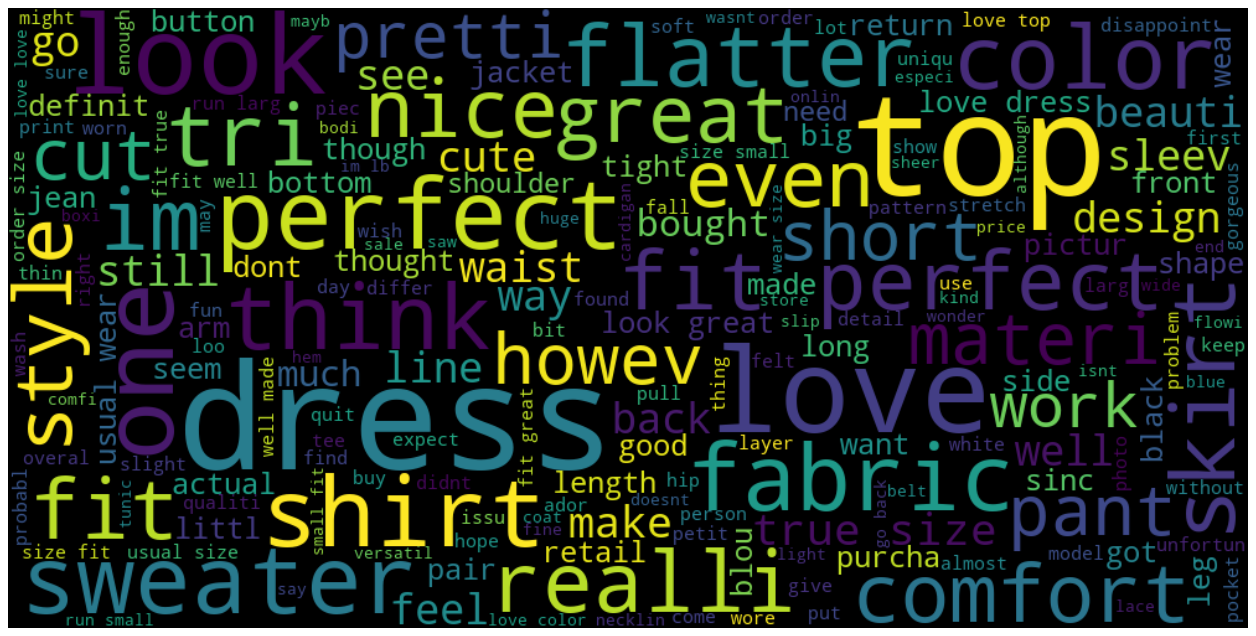

In [199]:
wordcloud = WordCloud(width = 1000,
                      height = 500,
                      random_state = 21,
                      max_font_size= 119).generate(words_all)
plt.figure(figsize = (20,20), dpi= 80)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

### Model Building

**First we need to transform the labels in Sentiment column into numerical form so that we can further proceed our model building approach.**

In [201]:
from sklearn.preprocessing import LabelEncoder

In [203]:
le = LabelEncoder()
data['Sentiment'] = le.fit_transform(data['Sentiment'])

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#TF-IDF are word frequency scores that try to highlight words that are more interesting,

In [205]:
X = data['Review Text']
y = data['Sentiment']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
vec = TfidfVectorizer()
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

In [208]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [209]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [210]:
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)

LogisticRegression()

In [211]:
lr_pred = lr.predict(X_test_vec)

In [212]:
# Create a function to visualize model results
def evaluate_lr(name,y_test, lr_pred):
    cm_test = confusion_matrix(y_test, lr_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("Classification Report for Data Test")
    print(classification_report(y_test, lr_pred))
    t1.plot()

Classification Report for Data Test

              precision    recall  f1-score   support



           0       0.56      0.42      0.48       457

           1       0.49      0.24      0.32       588

           2       0.87      0.97      0.92      3484



    accuracy                           0.82      4529

   macro avg       0.64      0.54      0.57      4529

weighted avg       0.79      0.82      0.79      4529




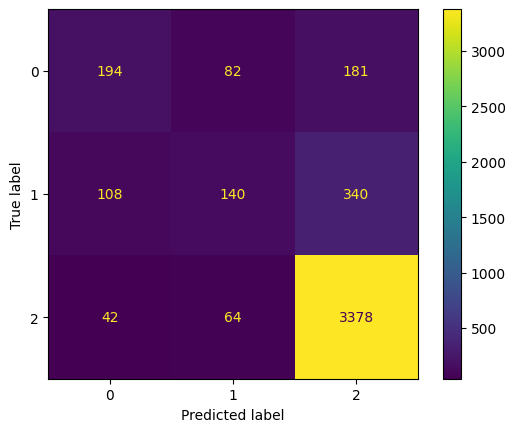

In [213]:
# Visualizing model results
evaluate_lr("Machine Learning - Classification", y_test, lr_pred)

In [216]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_vec, y_train)

DecisionTreeClassifier()

In [217]:
dt_pred = dt.predict(X_test_vec)

In [218]:
# Create a function to visualize model results
def evaluate_dt(name,y_test, dt_pred):
    cm_test = confusion_matrix(y_test, dt_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("Classification Report for Data Test")
    print(classification_report(y_test, dt_pred))
    t1.plot()

Classification Report for Data Test

              precision    recall  f1-score   support



           0       0.30      0.30      0.30       457

           1       0.26      0.23      0.25       588

           2       0.86      0.87      0.87      3484



    accuracy                           0.73      4529

   macro avg       0.47      0.47      0.47      4529

weighted avg       0.72      0.73      0.73      4529




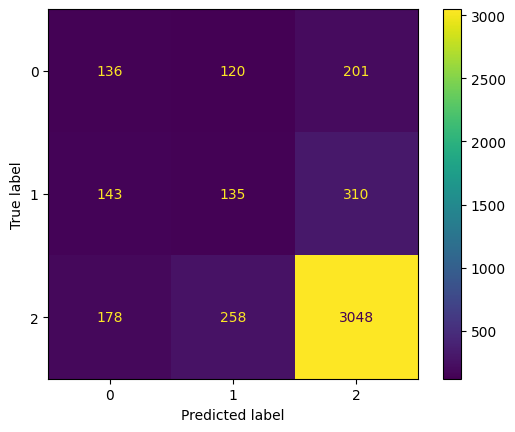

In [219]:
evaluate_dt("Machine Learning - Classification", y_test, dt_pred)

**Random Forest**

In [224]:
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)

RandomForestClassifier()

In [225]:
rf_pred = rf.predict(X_test_vec)

In [226]:
# Create a function to visualize model results
def evaluate_rf(name,y_test, rf_pred):
    cm_test = confusion_matrix(y_test, rf_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("Classification Report for Data Test")
    print(classification_report(y_test, rf_pred))
    t1.plot()

Classification Report for Data Test

              precision    recall  f1-score   support



           0       0.66      0.09      0.15       457

           1       0.58      0.01      0.02       588

           2       0.78      1.00      0.88      3484



    accuracy                           0.78      4529

   macro avg       0.67      0.37      0.35      4529

weighted avg       0.74      0.78      0.69      4529




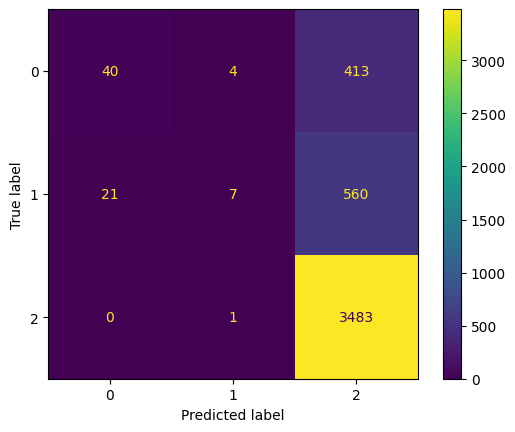

In [227]:
evaluate_rf("Machine Learning - Classification", y_test, rf_pred)

**SVM**

In [229]:
svm = SVC()
svm.fit(X_train_vec, y_train)

SVC()

In [230]:
svm_pred = svm.predict(X_test_vec)

In [231]:
# Create a function to visualize model results
def evaluate_svm(name,y_test, svm_pred):
    cm_test = confusion_matrix(y_test, svm_pred)
    t1 = ConfusionMatrixDisplay(cm_test)    
    print("Classification Report for Data Test")
    print(classification_report(y_test, svm_pred))
    t1.plot()

Classification Report for Data Test

              precision    recall  f1-score   support



           0       0.62      0.41      0.49       457

           1       0.53      0.19      0.28       588

           2       0.85      0.98      0.91      3484



    accuracy                           0.82      4529

   macro avg       0.67      0.53      0.56      4529

weighted avg       0.79      0.82      0.79      4529




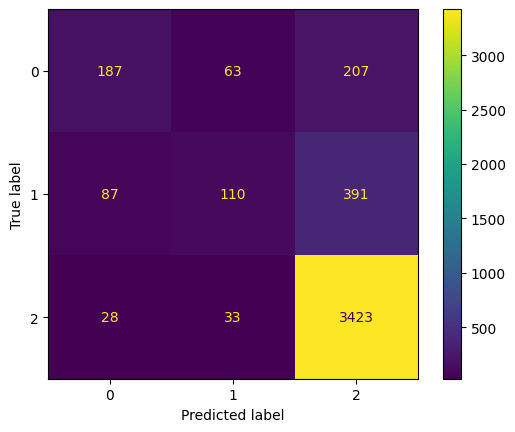

In [232]:
evaluate_svm("Machine Learning - Classification", y_test, svm_pred)